In [2]:
import cv2
import numpy as np 
from PIL import Image
from skimage import io
import matplotlib.pyplot as plt
import scipy.stats as st
from tqdm.notebook import tqdm_notebook as tqdm

In [3]:
filtr_1 = np.array([[1,1,1],
                    [1,1,1],
                    [1,1,1]])

filtr_2 = np.array([[1,2,1],
                    [2,4,2],
                    [1,2,1]])

# Funkcje

In [10]:
def conv(img, kernel):
    """
    apply filter
    """
    x = np.shape(img)[0]
    y = np.shape(img)[1]
    output = np.copy(img)
    img_border = set_border(img, kernel)
    for i in tqdm(range(0, x)):
        for j in range(0, y):
            output[i][j] = get_sum(img_border, i, j, kernel)
    return output

def get_gaussian(kernlen=11, nsig=3):
    """
    returns a 2D Gaussian kernel
    """
    x = np.linspace(-nsig, nsig, kernlen+1)
    kern1d = np.diff(st.norm.cdf(x))
    kern2d = np.outer(kern1d, kern1d)
    return kern2d/kern2d.sum()

def get_lowpass(kernlen=11):
    val=1/(kernlen*kernlen)
    ker = np.ones(kernlen*kernlen).reshape(kernlen, kernlen)
    return ker*val

def set_border(img, kernel):
    """
    returns image copy with border 
    """
    n = int(kernel.shape[0]/2)
    print("setting border to: {}".format(n))
    img_ = img.copy()
    top, bottom, left, right = [n]*4
    img_ = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_REPLICATE)
    return img_


def get_sum(img, i, j, kernel):
    """
    calculates sum of applied kernel 
    """
    n, kx, ky, summary = kernel.shape[0], 0, 0, []
    for k in range(int(n/2)*-1, int(n/2)+1):
        for l in range(int(n/2)*-1, int(n/2)+1):
            summary.append(img[i+k][j+l] * kernel[kx][ky])
            ky+= 1
        ky = 0
        kx += 1
    return sum(summary)
    

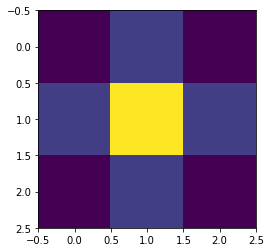

In [11]:
plt.imshow(get_gaussian(3));

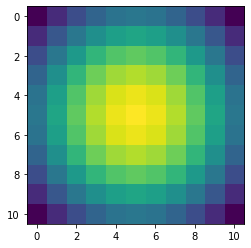

In [30]:
plt.imshow(get_gaussian(11, 1));

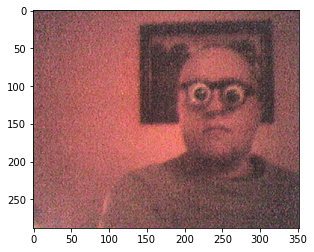

In [14]:
img = io.imread("onise.jpg")
plt.imshow(img);

setting border to: 1


  0%|          | 0/288 [00:00<?, ?it/s]

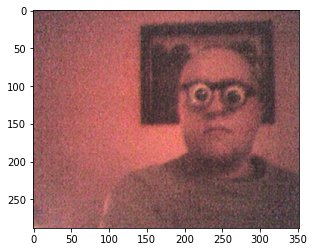

In [21]:
plt.imshow(conv(img, get_gaussian(3)));

setting border to: 1


  0%|          | 0/288 [00:00<?, ?it/s]

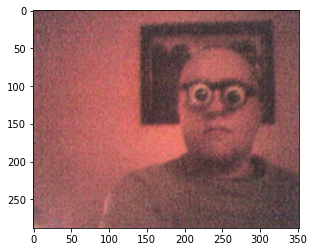

In [26]:
plt.imshow(conv(img, get_gaussian(3, 1)));

setting border to: 5


  0%|          | 0/288 [00:00<?, ?it/s]

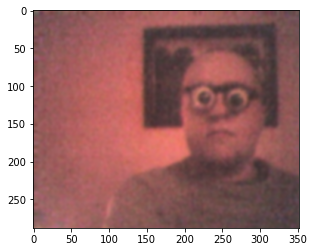

In [20]:
plt.imshow(conv(img, get_gaussian(11)));

setting border to: 1


  0%|          | 0/288 [00:00<?, ?it/s]

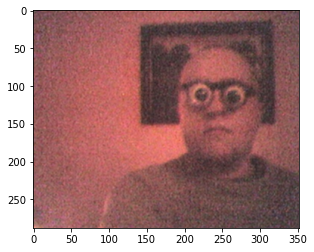

In [60]:
plt.imshow(conv(img, filtr_2*1/16));

setting border to: 1


  0%|          | 0/288 [00:00<?, ?it/s]

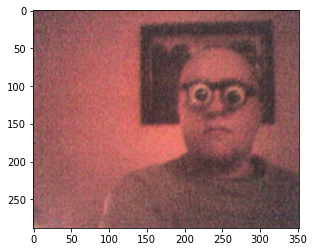

In [59]:
plt.imshow(conv(img, filtr_1*1/9));

setting border to: 5


  0%|          | 0/288 [00:00<?, ?it/s]

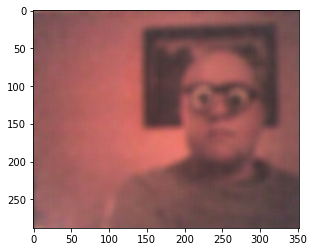

In [70]:
plt.imshow(conv(img, get_lowpass(11)));

setting border to: 4


  0%|          | 0/288 [00:00<?, ?it/s]

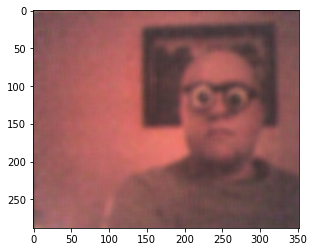

In [72]:
plt.imshow(conv(img, get_lowpass(9)));